In [14]:
import os
import re
import pandas as pd
import parse_raw_to_csv

data_dir= "../../experiments/hpl_scaling"

df = pd.DataFrame()

for f in os.listdir(data_dir):
    if len(re.findall(r"m(\d+).txt", f)) > 0:
        df_tmp = parse_raw_to_csv.parse_file_or_folder(os.path.join(data_dir,f), parse_raw_to_csv.parse_map.values())
        df_tmp["m"] = int(re.findall(r"m(\d+).txt", f)[0])
        df_tmp["type"] = "IEC"
        df_tmp["norm_flops"] = float(df_tmp["lu_gflops"])/(244*5)*100
        df = df.append(df_tmp)

for f in os.listdir(data_dir):
    if len(re.findall(r"m(\d+)_pcie.txt", f)) > 0:
        df_tmp = parse_raw_to_csv.parse_file_or_folder(os.path.join(data_dir,f), parse_raw_to_csv.parse_map.values())
        df_tmp["m"] = int(re.findall(r"m(\d+)_pcie.txt", f)[0])
        df_tmp["type"] = "PCIE"
        df_tmp["norm_flops"] = float(df_tmp["lu_gflops"])/(233.4*5)*100
        df = df.append(df_tmp)

for f in os.listdir(data_dir):
    if len(re.findall(r"m(\d+)_pcie_b8.txt", f)) > 0:
        df_tmp = parse_raw_to_csv.parse_file_or_folder(os.path.join(data_dir,f), parse_raw_to_csv.parse_map.values())
        if df_tmp.empty:
            continue
        df_tmp["m"] = int(re.findall(r"m(\d+)_pcie_b8.txt", f)[0])
        df_tmp["type"] = "PCIE"
        df_tmp["norm_flops"] = float(df_tmp["lu_gflops"])/(280*2)*100
        df = df.append(df_tmp)

data_dir= "../../experiments/hpl_scaling/u280"

for f in os.listdir(data_dir):
    if len(re.findall(r"m(\d+)_pcie.txt", f)) > 0:
        df_tmp = parse_raw_to_csv.parse_file_or_folder(os.path.join(data_dir,f), parse_raw_to_csv.parse_map.values())
        df_tmp["m"] = int(re.findall(r"m(\d+)_pcie.txt", f)[0])
        df_tmp["type"] = "PCIE"
        df_tmp["norm_flops"] = float(df_tmp["lu_gflops"])/(156*2)*100
        df = df.append(df_tmp)

df["benchmark"] = df.index
df = df.apply(pd.to_numeric, errors='ignore')
df = df.reset_index()

df.to_csv("hpl_scaling.csv")
df

,index,version,size,device,error,resid,epsilon,total_best_time,total_avg_time,total_gflops,...,lu_avg_time,lu_gflops,sl_best_time,sl_avg_time,sl_gflops,filename,m,type,norm_flops,benchmark
0,LINPACK,2.4,1024,p520_max_sg280l : BittWare Stratix 10 OpenCL p...,0.000043,0.000006,1.192090e-07,0.011866,0.011876,60.5033,...,0.011876,60.3267,2.400000e-08,2.820000e-08,87381.3,../../experiments/hpl_scaling/m2.txt,2,IEC,4.944811,LINPACK
1,LINPACK,2.4,7680,p520_max_sg280l : BittWare Stratix 10 OpenCL p...,0.000005,0.000035,1.192090e-07,0.660400,0.660634,457.4620,...,0.660634,457.2830,2.800000e-08,4.000000e-08,4213030.0,../../experiments/hpl_scaling/m15.txt,15,IEC,37.482213,LINPACK
2,LINPACK,2.4,14848,p520_max_sg280l : BittWare Stratix 10 OpenCL p...,0.000002,0.000042,1.192090e-07,2.850240,2.853120,765.8050,...,2.853120,765.6510,2.900000e-08,3.320000e-08,15204400.0,../../experiments/hpl_scaling/m29.txt,29,IEC,62.758279,LINPACK
3,LINPACK,2.4,14336,p520_max_sg280l : BittWare Stratix 10 OpenCL p...,0.000002,0.000041,1.192090e-07,2.586390,2.588580,759.6090,...,2.588580,759.4500,2.900000e-08,3.400000e-08,14173900.0,../../experiments/hpl_scaling/m28.txt,28,IEC,62.250000,LINPACK
4,LINPACK,2.4,7168,p520_max_sg280l : BittWare Stratix 10 OpenCL p...,0.000006,0.000039,1.192090e-07,0.563526,0.563872,435.8840,...,0.563872,435.7010,2.600000e-08,3.320000e-08,3952320.0,../../experiments/hpl_scaling/m14.txt,14,IEC,35.713197,LINPACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,LINPACK,2.4,14336,xilinx_u280_xdma_201920_3 ,0.000002,0.000038,1.192090e-07,13.659900,14.495400,143.8250,...,14.495400,143.7950,4.000000e-08,1.012000e-07,10276000.0,../../experiments/hpl_scaling/u280/m56_pcie.txt,56,PCIE,46.088141,LINPACK
129,LINPACK,2.4,5120,xilinx_u280_xdma_201920_3 ,0.000005,0.000016,1.192090e-07,0.801436,0.820754,111.7130,...,0.820754,111.6480,8.900000e-08,2.082000e-07,589088.0,../../experiments/hpl_scaling/u280/m20_pcie.txt,20,PCIE,35.784615,LINPACK
130,LINPACK,2.4,3584,xilinx_u280_xdma_201920_3 ,0.000007,0.000011,1.192090e-07,0.376299,0.380164,81.6287,...,0.380164,81.5605,1.000000e-07,2.676000e-07,256901.0,../../experiments/hpl_scaling/u280/m14_pcie.txt,14,PCIE,26.141186,LINPACK
131,LINPACK,2.4,10240,xilinx_u280_xdma_201920_3 ,0.000003,0.000040,1.192090e-07,5.152900,5.333300,138.9580,...,5.333290,138.9180,3.900000e-08,1.658000e-07,5377310.0,../../experiments/hpl_scaling/u280/m40_pcie.txt,40,PCIE,44.525000,LINPACK


In [15]:
b=512
g=8
f=270e6
f_c = 157e6
t_mm =  (((b ** 2)/(g*f)*3.5 + (b/g) ** 3 / f))
#       load and store block   forward rows and cols    update matrix
t_lu =  (b ** 2)/(g*f)*4 + sum(300/f + (b/g)/f_c + (b * (b - g * int(i/g)))/(g ** 2) / f for i in range(b))

def perf_last(m, torus_width=1, time=False, r=5):
    #LU time at the very beginning of the calculation and at the very end
    lu_total = t_lu + max(m - 2, 0) * t_lu
    def lu_runtime(i):
        return t_lu + max(math.ceil(i/torus_width) - 2,0) * t_lu  #+ max(math.ceil(i/torus_width) - 2,0) * (torus_width * 150*b + 700*b)/f
    def mm_runtime(i):
        remaining_blocks = i/torus_width
        return ((remaining_blocks ** 2) / r) * t_mm
    main_calc_time = sum(max(((2 * (i /torus_width) - 1) / r) * t_mm + lu_runtime(i), mm_runtime(i))  for i in range(1,m * torus_width))
    exe_time = lu_total + main_calc_time
    gflops = (2*((m*torus_width*512) ** 3)/3)/ exe_time * 1.0e-9
    if time:
        return exe_time
    else:
        return gflops

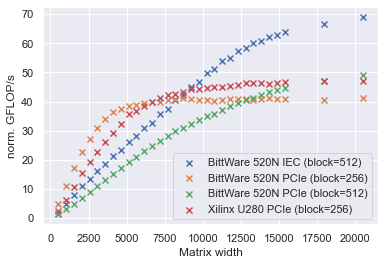

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#Just use set_theme() function of seaborn library for a nice looking appearance.
sns.set_theme()

plot_dfs = {}

plot_dfs["BittWare 520N IEC (block=512)"] = df[(df["size"] <= 80*256) & (df["device"].str.contains("p520_max"))]
plot_dfs["BittWare 520N PCIe (block=256)"] = df[(df["size"] <= 80*256) & (df["device"].str.contains("p520_hpc")) & (df["size"]/df["m"] == 256)]
plot_dfs["BittWare 520N PCIe (block=512)"] = df[(df["size"] <= 80*256) & (df["device"].str.contains("p520_hpc")) & (df["size"]/df["m"] == 512)]
plot_dfs["Xilinx U280 PCIe (block=256)"] = df[(df["size"] <= 80*256) & (df["device"].str.contains("xilinx"))]

fig, hpl = plt.subplots(1)
for k in plot_dfs:
    hpl.scatter(plot_dfs[k]["size"], plot_dfs[k]["norm_flops"], label=k, marker="x")
#hpl.plot(list(range(66)), [perf_last(m) for m in range(66)], label="Model")
#hpl.plot(np.linspace(0,66), [(2* 512 ** 3)/(((b ** 2)/(g*f)*2 + (b/g) ** 3 / f)) * 1.0e-9 * 5 for m in np.linspace(0,66)], label="Model", linestyle="--")
#hpl.plot(np.linspace(0,66), [(2* 512 ** 3)/(((b ** 2)/(g*f)*4 + (b/g) ** 3 / f))* 1.0e-9 * 5 for m in np.linspace(0,66)], label="Matrix Multiplication", linestyle="--")
#hpl.annotate("%.1f GFLOP/s" % ((2* 512 ** 3)/(((b ** 2)/(g*f)*2 + (b/g) ** 3 / f)) * 1.0e-9 * 5), (1,(2* 512 ** 3)/(((b ** 2)/(g*f)*2 + (b/g) ** 3 / f)) * 1.0e-9 * 5 + 20))
#hpl.annotate("%.1f GFLOP/s" % ((2* 512 ** 3)/(((b ** 2)/(g*f)*4 + (b/g) ** 3 / f)) * 1.0e-9 * 5), (1,(2* 512 ** 3)/(((b ** 2)/(g*f)*4 + (b/g) ** 3 / f)) * 1.0e-9 * 5 + 20))
hpl.set_xlabel("Matrix width")
hpl.set_ylabel("norm. GFLOP/s")
hpl.legend()
fig.savefig("hpl_scaling_norm.pdf")

In [17]:
df[(df["size"] <= 80*256) & (df["device"].str.contains("p520_hpc")) & (df["size"]/df["m"] == 256)]

,index,version,size,device,error,resid,epsilon,total_best_time,total_avg_time,total_gflops,...,lu_avg_time,lu_gflops,sl_best_time,sl_avg_time,sl_gflops,filename,m,type,norm_flops,benchmark
69,LINPACK,2.4,3584,p520_hpc_sg280l : BittWare Stratix 10 OpenCL p...,7.085490e-06,0.000011,1.192090e-07,0.160965,0.163695,190.8290,...,0.163695,190.6700,2.600000e-08,3.100000e-08,988081.0,../../experiments/hpl_scaling/m14_pcie_b8.txt,14,PCIE,34.048214,LINPACK
70,LINPACK,2.4,6656,p520_hpc_sg280l : BittWare Stratix 10 OpenCL p...,2.772320e-06,0.000015,1.192090e-07,0.881928,0.890629,223.0030,...,0.890629,222.9030,2.800000e-08,3.100000e-08,3164450.0,../../experiments/hpl_scaling/m26_pcie_b8.txt,26,PCIE,39.804107,LINPACK
71,LINPACK,2.4,14336,p520_hpc_sg280l : BittWare Stratix 10 OpenCL p...,1.310670e-06,0.000032,1.192090e-07,8.515150,8.561970,230.7230,...,8.561970,230.6750,2.900000e-08,3.620000e-08,14173900.0,../../experiments/hpl_scaling/m56_pcie_b8.txt,56,PCIE,41.191964,LINPACK
72,LINPACK,2.4,20480,p520_hpc_sg280l : BittWare Stratix 10 OpenCL p...,7.517060e-07,0.000038,1.192090e-07,24.716800,24.926500,231.7240,...,24.926500,231.6900,3.100000e-08,3.720000e-08,27060000.0,../../experiments/hpl_scaling/m80_pcie_b8.txt,80,PCIE,41.373214,LINPACK
73,LINPACK,2.4,1536,p520_hpc_sg280l : BittWare Stratix 10 OpenCL p...,2.741040e-05,0.000008,1.192090e-07,0.025022,0.025695,96.7404,...,0.025695,96.5520,2.600000e-08,3.180000e-08,181484.0,../../experiments/hpl_scaling/m6_pcie_b8.txt,6,PCIE,17.241429,LINPACK
74,LINPACK,2.4,4608,p520_hpc_sg280l : BittWare Stratix 10 OpenCL p...,4.666750e-06,0.000012,1.192090e-07,0.310317,0.315380,210.3410,...,0.315380,210.2040,3.000000e-08,4.940000e-08,1415580.0,../../experiments/hpl_scaling/m18_pcie_b8.txt,18,PCIE,37.536429,LINPACK
75,LINPACK,2.4,11776,p520_hpc_sg280l : BittWare Stratix 10 OpenCL p...,1.591480e-06,0.000027,1.192090e-07,4.769080,4.790370,228.3380,...,4.790370,228.2800,2.800000e-08,4.180000e-08,9905300.0,../../experiments/hpl_scaling/m46_pcie_b8.txt,46,PCIE,40.764286,LINPACK
76,LINPACK,2.4,9216,p520_hpc_sg280l : BittWare Stratix 10 OpenCL p...,2.276330e-06,0.000023,1.192090e-07,2.279190,2.294620,229.0330,...,2.294620,228.9580,2.700000e-08,3.320000e-08,6291460.0,../../experiments/hpl_scaling/m36_pcie_b8.txt,36,PCIE,40.885357,LINPACK
77,LINPACK,2.4,12800,p520_hpc_sg280l : BittWare Stratix 10 OpenCL p...,1.513870e-06,0.000030,1.192090e-07,6.096820,6.132310,229.3700,...,6.132310,229.3170,2.700000e-08,3.580000e-08,12136300.0,../../experiments/hpl_scaling/m50_pcie_b8.txt,50,PCIE,40.949464,LINPACK
78,LINPACK,2.4,5120,p520_hpc_sg280l : BittWare Stratix 10 OpenCL p...,4.392280e-06,0.000014,1.192090e-07,0.417157,0.423796,214.6220,...,0.423796,214.4960,2.700000e-08,3.680000e-08,1941810.0,../../experiments/hpl_scaling/m20_pcie_b8.txt,20,PCIE,38.302857,LINPACK


In [18]:
50000/f

0.00018518518518518518

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import parse_raw_to_csv_novalidate
import os
import numpy as np

df = pd.DataFrame()

for i in range(40,56):
    df_tmp = parse_raw_to_csv_novalidate.parse_file_or_folder("../experiments/hpl_scaling/m%d_sq_large.txt" % i, parse_raw_to_csv_novalidate.parse_map.values())
    df_tmp["m"] = i
    df = df.append(df_tmp)

df["benchmark"] = df.index
df = df.apply(pd.to_numeric, errors='ignore')
df = df.reset_index()
df

ModuleNotFoundError: No module named 'parse_raw_to_csv_novalidate'

In [ ]:
fig, hpl = plt.subplots(1)
hpl.plot(df["m"], df["lu_gflops"])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import parse_raw_to_csv_novalidate
import os
import numpy as np

df = pd.DataFrame()

for i in [20 + t*5 for t in range(1,11)]:
    df_tmp = parse_raw_to_csv_novalidate.parse_file_or_folder("../experiments/hpl_scaling/m%d_sq.txt" % i, parse_raw_to_csv_novalidate.parse_map.values())
    df_tmp["m"] = i
    df = df.append(df_tmp)

df["benchmark"] = df.index
df = df.apply(pd.to_numeric, errors='ignore')
df = df.reset_index()
df

In [ ]:
fig, hpl = plt.subplots(1)
hpl.plot(df["m"], df["lu_gflops"])
hpl.plot(range(71), [perf(m) for m in range(71)])
hpl.set_ylim(0,1200)